#### >>> Problem Statement: Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [1]:
#1) Age: Represents the age of the person
#2) Annual_Income: Represents the annual income of the person
#3) Monthly_Inhand_Salary: Represents the monthly base salary of a person
#4) Num_Bank_Accounts:Represents the number of bank accounts a person holds
#5) Num_Credit_Card: Represents the number of other credit cards held by a person
#6) Interest_Rate: Represents the interest rate on credit card
#7) Num_of_Loan: Represents the number of loans taken from the bank
#8) Delay_from_due_date: Represents the average number of days delayed from the payment date
#9) Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
#10) Changed_Credit_Limit: Represents the percentage change in credit card limit
#11) Num_Credit_Inquiries: Represents the number of credit card inquiries
#12) Credit_Mix: Represents the classification of the mix of credits
#13) Outstanding_Debt: Represents the remaining debt to be paid (in USD)
#14) Credit_Utilization_Ratio: Represents the utilization ratio of credit card
#15) Credit_History_Age: Represents the age of credit history of the person
#16) Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
#17) Total_EMI_per_month: Represents the monthly EMI payments (in USD)
#18) Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
#19) Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

### 20)Target --> Credit_Score: Represents the bracket of credit score (Poor, Standard)

In [2]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data
credit=pd.read_csv(r"D:\Edubridge\project\project_ML.csv")
credit.head(2)

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,6.0,4.0,23.933795,271.0,No,24.785217,358.124168,Standard,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,4.0,2.0,24.464031,319.0,No,104.291825,470.690627,Standard,Good,...,28.0,34847.84,2.0,4.0,6.0,1.0,3037.986667,5.42,605.03,18.816215


In [4]:
#shape of the data
credit.shape

(82137, 21)

In [5]:
#Checking the datatypes
credit.dtypes

Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries        float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
Credit_Mix                   object
Payment_Behaviour            object
Age                         float64
Annual_Income               float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Monthly_Inhand_Salary       float64
Changed_Credit_Limit        float64
Outstanding_Debt            float64
Total_EMI_per_month         float64
dtype: object

In [6]:
#To check the feature names
credit.columns

Index(['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Credit_Mix', 'Payment_Behaviour', 'Age',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month'],
      dtype='object')

In [7]:
#To check the null values
credit.isnull().sum()        

Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Amount_invested_monthly        0
Monthly_Balance                0
Credit_Score                   0
Credit_Mix                     0
Payment_Behaviour              0
Age                            0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Monthly_Inhand_Salary          0
Changed_Credit_Limit           0
Outstanding_Debt               0
Total_EMI_per_month         7795
dtype: int64

In [8]:
Credit_Score=credit.Credit_Score
credit.Credit_Score.value_counts()

Standard    53149
Poor        28988
Name: Credit_Score, dtype: int64

<Axes: xlabel='Credit_Score', ylabel='count'>

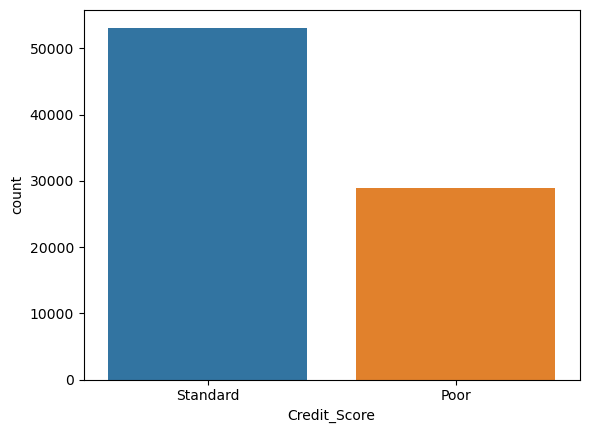

In [9]:
sns.countplot(x=credit.Credit_Score)

In [10]:
credit.Credit_Mix.value_counts()

Standard    43203
Bad         23417
Good        15517
Name: Credit_Mix, dtype: int64

In [11]:
# From this graph we observe that our data shows class imbalance problem

In [12]:
credit=credit.drop(['Credit_Score'],axis=1)
#credit.head(2)

In [13]:
credit['Credit_Score']=Credit_Score

In [14]:
numerical_features = credit.select_dtypes(include=[np.number]).columns.tolist() #find the numner of numerical features 
print("Numerical Features:", len(numerical_features))
numerical_features

Numerical Features: 17


['Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Monthly_Inhand_Salary',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Total_EMI_per_month']

In [15]:
categorical_features = credit.select_dtypes(include=[np.object]).columns.tolist()
print("Categorical Features:", len(categorical_features))  #find the numner of categorical features
categorical_features

Categorical Features: 4


['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score']

## Missing Value treatment

In [16]:
credit.isnull().sum()  

Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Amount_invested_monthly        0
Monthly_Balance                0
Credit_Mix                     0
Payment_Behaviour              0
Age                            0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Monthly_Inhand_Salary          0
Changed_Credit_Limit           0
Outstanding_Debt               0
Total_EMI_per_month         7795
Credit_Score                   0
dtype: int64

In [17]:
credit.Total_EMI_per_month=credit.Total_EMI_per_month.fillna(credit.Total_EMI_per_month.median())

## LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
credit.Payment_of_Min_Amount=le.fit_transform(credit.Payment_of_Min_Amount)
credit.Credit_Score=le.fit_transform(credit.Credit_Score)
credit.Credit_Mix=le.fit_transform(credit.Credit_Mix)
credit.Payment_Behaviour=le.fit_transform(credit.Payment_Behaviour)

In [20]:
credit1=credit
credit2=credit
credit3=credit
credit4=credit
credit5=credit

In [21]:
credit.Credit_Mix.value_counts()

2    43203
0    23417
1    15517
Name: Credit_Mix, dtype: int64

## Basic Model Building

In [22]:
x=credit.iloc[:,:-1]
y=credit.iloc[:,-1]
y.value_counts()

1    53149
0    28988
Name: Credit_Score, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((65709, 20), (16428, 20), (65709,), (16428,))

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,classification_report
lg=LogisticRegression()
print(lg)
lg.fit(x_train,y_train)
lg_p=lg.predict(x_test)
cf1=confusion_matrix(y_test,lg_p)
ac1=cf1.diagonal().sum()/cf1.sum()*100
re1=recall_score(y_test,lg_p)
pr1=precision_score(y_test,lg_p)
f1=f1_score(y_test,lg_p)
print("\n",classification_report(y_test,lg_p))
print("\nConfusion Matrix")
print(cf1)

LogisticRegression()

               precision    recall  f1-score   support

           0       0.57      0.36      0.44      5753
           1       0.71      0.85      0.78     10675

    accuracy                           0.68     16428
   macro avg       0.64      0.61      0.61     16428
weighted avg       0.66      0.68      0.66     16428


Confusion Matrix
[[2088 3665]
 [1564 9111]]


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
print(dt)
dt.fit(x_train,y_train)
dt_p=dt.predict(x_test)
cf2=confusion_matrix(y_test,dt_p)
ac2=cf2.diagonal().sum()/cf2.sum()*100
re2=recall_score(y_test,dt_p)
pr2=precision_score(y_test,dt_p)
f2=f1_score(y_test,dt_p)
print("\n",classification_report(y_test,dt_p))
print("\nConfusion Matrix")
print(cf2)

DecisionTreeClassifier()

               precision    recall  f1-score   support

           0       0.73      0.74      0.74      5753
           1       0.86      0.86      0.86     10675

    accuracy                           0.81     16428
   macro avg       0.80      0.80      0.80     16428
weighted avg       0.81      0.81      0.81     16428


Confusion Matrix
[[4244 1509]
 [1547 9128]]


# Random Forest model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
print(rf)
rf.fit(x_train,y_train)
rf_p=rf.predict(x_test)
cf3=confusion_matrix(y_test,rf_p)
ac3=cf3.diagonal().sum()/cf3.sum()*100
re3=recall_score(y_test,rf_p)
pr3=precision_score(y_test,rf_p)
f3=f1_score(y_test,rf_p)
print("\n",classification_report(y_test,rf_p))
print("\nConfusion Matrix")
print(cf3)

RandomForestClassifier()

               precision    recall  f1-score   support

           0       0.80      0.85      0.83      5753
           1       0.92      0.89      0.90     10675

    accuracy                           0.87     16428
   macro avg       0.86      0.87      0.86     16428
weighted avg       0.88      0.87      0.88     16428


Confusion Matrix
[[4885  868]
 [1190 9485]]


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
print(knn)
knn.fit(x_train,y_train)
knn_p=knn.predict(x_test)
cf4=confusion_matrix(y_test,knn_p)
ac4=cf4.diagonal().sum()/cf4.sum()*100
re4=recall_score(y_test,knn_p)
pr4=precision_score(y_test,knn_p)
f4=f1_score(y_test,knn_p)
print("\n",classification_report(y_test,knn_p))
print("\nConfusion Matrix")
print(cf4)

KNeighborsClassifier()

               precision    recall  f1-score   support

           0       0.76      0.79      0.78      5753
           1       0.89      0.87      0.87     10675

    accuracy                           0.84     16428
   macro avg       0.82      0.83      0.83     16428
weighted avg       0.84      0.84      0.84     16428


Confusion Matrix
[[4554 1199]
 [1441 9234]]


## XGB

In [28]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
print(xgb)
xgb.fit(x_train,y_train)
xgb_p=xgb.predict(x_test)
cf5=confusion_matrix(y_test,xgb_p)
ac5=cf5.diagonal().sum()/cf5.sum()*100
re5=recall_score(y_test,xgb_p)
pr5=precision_score(y_test,xgb_p)
f5=f1_score(y_test,xgb_p)
print("\n",classification_report(y_test,xgb_p))
print("\nConfusion Matrix")
print(cf5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

               precision    recall  f1-score   support

           0       0.78      0.76      0.77      5753
           1       0.87      0.88      0.88     10675

    accuracy                           0.84     16428
   macro avg       0.82     

## Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
print(nb)
nb.fit(x_train,y_train)
nb_p=nb.predict(x_test)
cf6=confusion_matrix(y_test,nb_p)
ac6=cf6.diagonal().sum()/cf6.sum()*100
re6=recall_score(y_test,nb_p)
pr6=precision_score(y_test,nb_p)
f6=f1_score(y_test,nb_p)
print("\n",classification_report(y_test,nb_p))
print("\nConfusion Matrix")
print(cf6)

MultinomialNB()

               precision    recall  f1-score   support

           0       0.50      0.70      0.58      5753
           1       0.79      0.63      0.70     10675

    accuracy                           0.65     16428
   macro avg       0.65      0.66      0.64     16428
weighted avg       0.69      0.65      0.66     16428


Confusion Matrix
[[4004 1749]
 [3982 6693]]


## SVM

In [30]:
from sklearn.svm import SVC
svm=SVC()
print(svm)
svm.fit(x_train,y_train)
svm_p=svm.predict(x_test)
cf7=confusion_matrix(y_test,svm_p)
ac7=cf7.diagonal().sum()/cf7.sum()*100
re7=recall_score(y_test,svm_p)
pr7=precision_score(y_test,svm_p)
f7=f1_score(y_test,svm_p)
print("\n",classification_report(y_test,svm_p))
print("\nConfusion Matrix")
print(cf7)

SVC()

               precision    recall  f1-score   support

           0       0.51      0.24      0.33      5753
           1       0.68      0.88      0.77     10675

    accuracy                           0.65     16428
   macro avg       0.60      0.56      0.55     16428
weighted avg       0.62      0.65      0.61     16428


Confusion Matrix
[[1401 4352]
 [1334 9341]]


#### Basic Models Results

In [31]:
l1=['Logistic','Decision Tree','Random Forest','KNN','xgb','NB','SVM']
accuracy=[ac1,ac2,ac3,ac4,ac5,ac6,ac7]
precision=[pr1,pr2,pr3,pr4,pr5,pr6,pr7]
recall=[re1,re2,re3,re4,re5,re6,re7]
f1_score=[f1,f2,f3,f4,f5,f6,f7]

In [32]:
t1=pd.DataFrame({"Model":l1,"Accuracy":accuracy,"Precision":precision,"Recall":recall,"f1-score":f1_score})
from tabulate import tabulate
print("BASIC MODEL RESULTS :")
print(tabulate(t1,headers="keys",tablefmt="psql"))

BASIC MODEL RESULTS :
+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision |   Recall |   f1-score |
|----+---------------+------------+-------------+----------+------------|
|  0 | Logistic      |    68.1702 |    0.713134 | 0.853489 |   0.777024 |
|  1 | Decision Tree |    81.3976 |    0.858137 | 0.855082 |   0.856607 |
|  2 | Random Forest |    87.4726 |    0.91616  | 0.888525 |   0.90213  |
|  3 | KNN           |    83.9299 |    0.885076 | 0.865012 |   0.874929 |
|  4 | xgb           |    83.9421 |    0.872532 | 0.881686 |   0.877085 |
|  5 | NB            |    65.1144 |    0.792822 | 0.626979 |   0.700214 |
|  6 | SVM           |    65.3884 |    0.682173 | 0.875035 |   0.766661 |
+----+---------------+------------+-------------+----------+------------+


##### Conclusion : From the above table we observe that accuracy for Random Forest model is good. Also, f1_score value is more for RF as compared to other models. So, we can conclude that Random Forest model is well fitted to the data.

In [34]:
#Here the count of True Negative is high as compared to True Positive so, we have to plot PRC curve here.

In [35]:
prob3=rf.predict_proba(x_test)
df3=pd.DataFrame(prob3)

In [36]:
#PRC curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import  f1_score
precision,recall,threshold=precision_recall_curve(y_test,df3.iloc[:,1])

Text(0.5, 1.0, 'PRC-Curve')

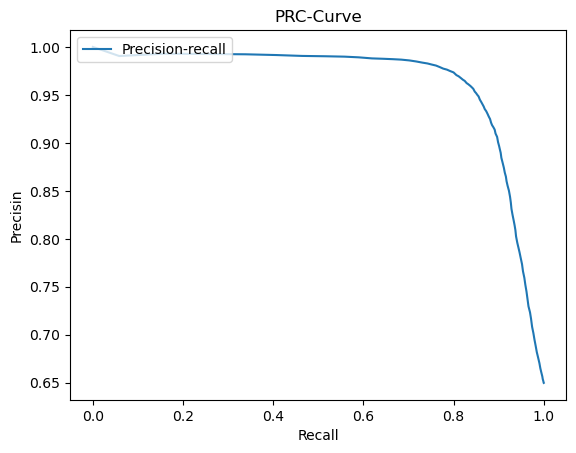

In [37]:
plt.plot(recall,precision,label='Precision-recall')
plt.xlabel('Recall')
plt.ylabel('Precisin')
plt.legend(loc='upper left')
plt.title('PRC-Curve')

# Random oversampling

In [38]:
c_1,c_0=credit1.Credit_Score.value_counts()
c_1,c_0

(53149, 28988)

In [39]:
credit.Credit_Score.value_counts()

1    53149
0    28988
Name: Credit_Score, dtype: int64

In [40]:
credit_0=credit[credit["Credit_Score"]==0]
credit_1=credit[credit["Credit_Score"]==1]

In [41]:
class_0over=credit_0.sample(c_1,replace=True)
class_0over.head(2)
class_0over.shape,credit_1.shape

((53149, 21), (53149, 21))

In [42]:
class1_0=pd.concat([credit_1,class_0over],axis=0)
class1_0.shape

(106298, 21)

In [43]:
class1_0.Credit_Score.value_counts()

1    53149
0    53149
Name: Credit_Score, dtype: int64

In [44]:
class1_0.head(2)

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Mix,Payment_Behaviour,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,3.0,6.0,4.0,23.933795,271.0,1,24.785217,358.124168,1,1,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,1
1,3.0,4.0,2.0,24.464031,319.0,1,104.291825,470.690627,1,0,...,34847.84,2.0,4.0,6.0,1.0,3037.986667,5.42,605.03,18.816215,1


## Outlier Treatment

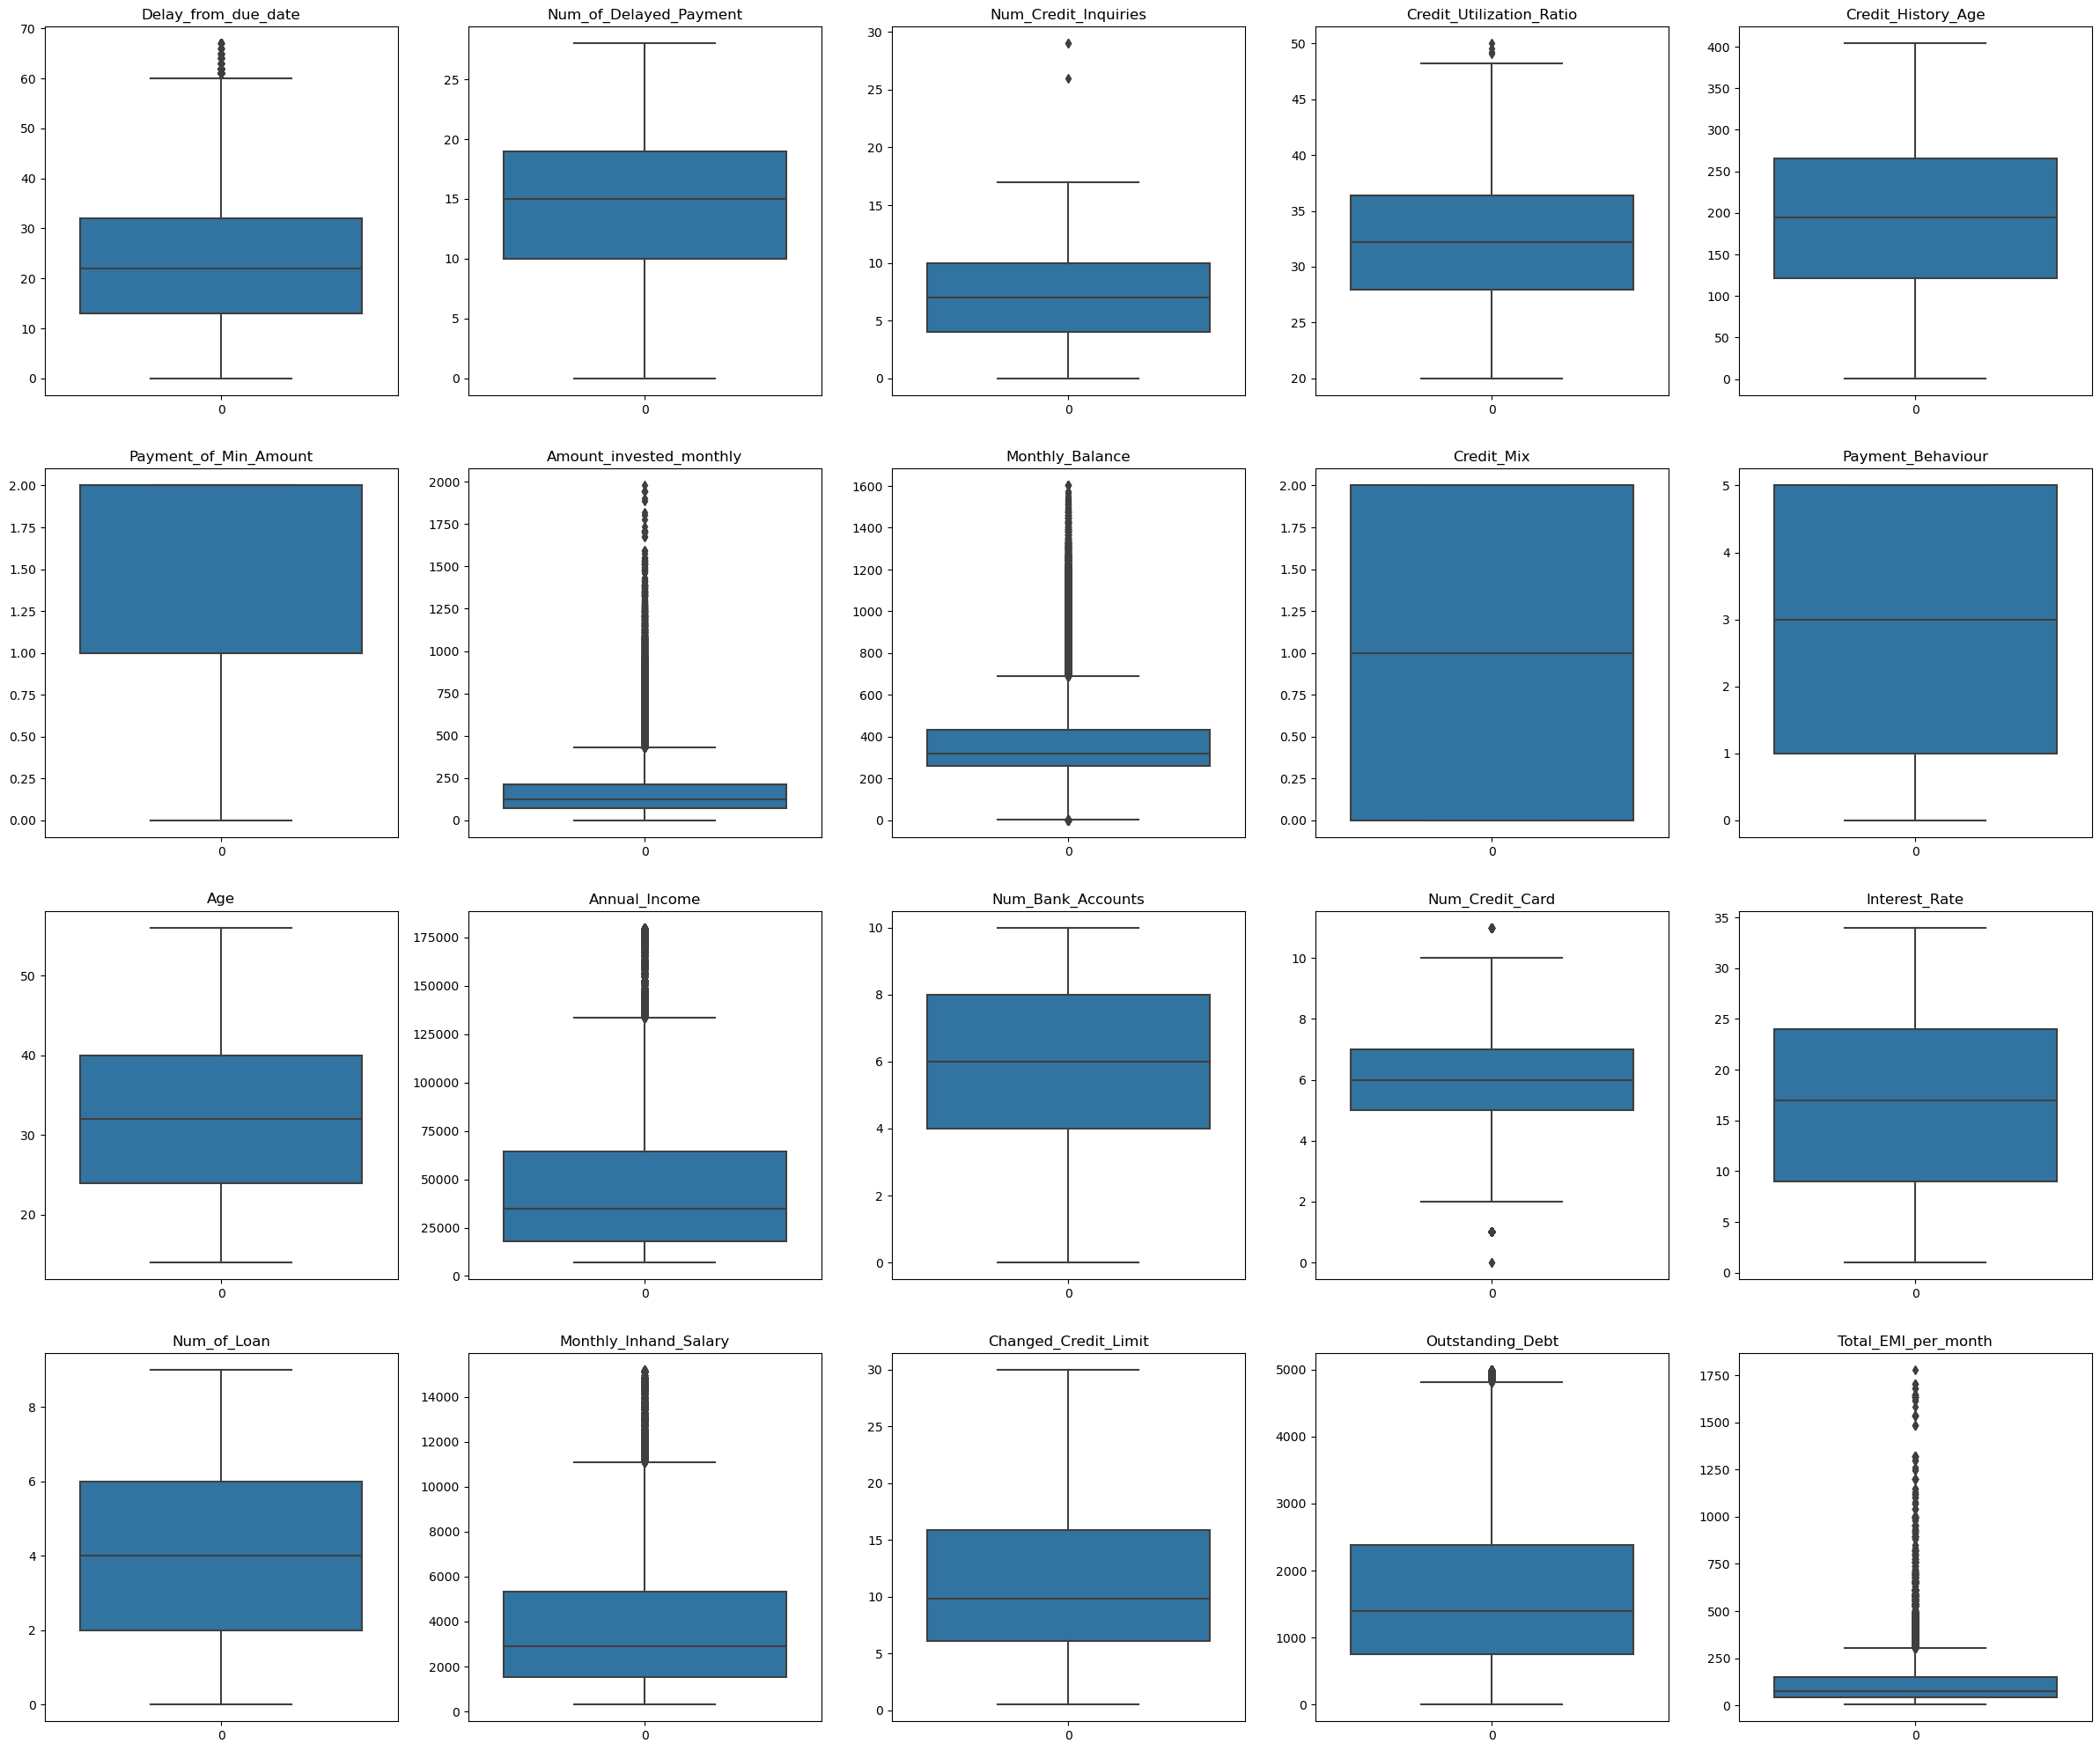

In [45]:
import seaborn as sns
num_cols=['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance',
        'Credit_Mix', 'Payment_Behaviour', 'Age',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,5,figsize=(30,25))
index=0
ax=ax.flatten()
for i in class1_0:
    if i in num_cols:
        sns.boxplot(class1_0[i],ax=ax[index])
        ax[index].set_title(i)
        index+=1              
plt.show()

In [46]:
class1_0.skew()

Delay_from_due_date         0.730306
Num_of_Delayed_Payment     -0.325234
Num_Credit_Inquiries        0.124385
Credit_Utilization_Ratio    0.021807
Credit_History_Age          0.222987
Payment_of_Min_Amount      -1.100248
Amount_invested_monthly     2.595416
Monthly_Balance             1.779711
Credit_Mix                 -0.299190
Payment_Behaviour          -0.097783
Age                         0.180767
Annual_Income               1.264346
Num_Bank_Accounts          -0.379758
Num_Credit_Card             0.237358
Interest_Rate               0.167711
Num_of_Loan                 0.222039
Monthly_Inhand_Salary       1.262465
Changed_Credit_Limit        0.614932
Outstanding_Debt            0.877128
Total_EMI_per_month         3.355266
Credit_Score                0.000000
dtype: float64

<Axes: >

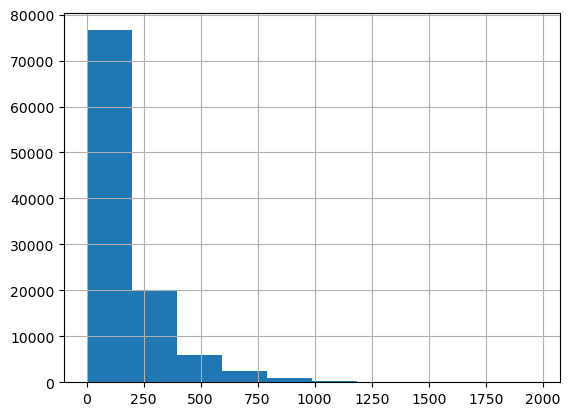

In [47]:
class1_0.Amount_invested_monthly.hist()

<Axes: >

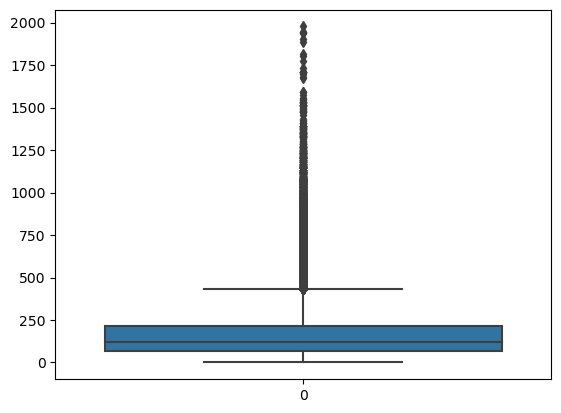

In [48]:
sns.boxplot(class1_0.Amount_invested_monthly)

In [49]:
IQR1=class1_0.Amount_invested_monthly.quantile(0.75)-class1_0.Amount_invested_monthly.quantile(0.25)
IQR1

143.79423990232758

In [50]:
ub1=class1_0.Amount_invested_monthly.quantile(0.75)+1.5*IQR1
lb1=class1_0.Amount_invested_monthly.quantile(0.25)-1.5*IQR1
print(ub1,lb1)

429.9619915023238 -145.21496810698648


In [51]:
class1_0.loc[class1_0['Amount_invested_monthly']>430.9290377001033,'Amount_invested_monthly']=430.9290377001033

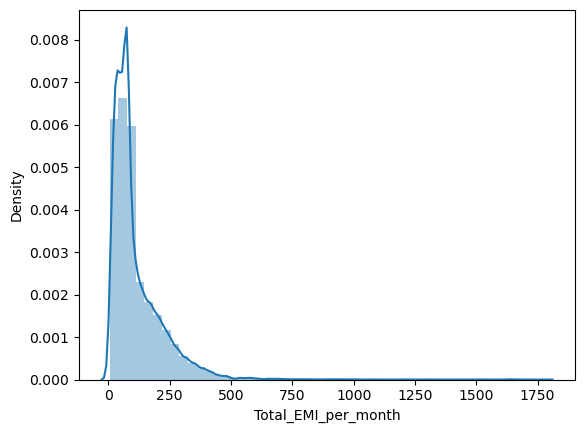

In [52]:
sns.distplot(class1_0.Total_EMI_per_month)
plt.show()

<Axes: >

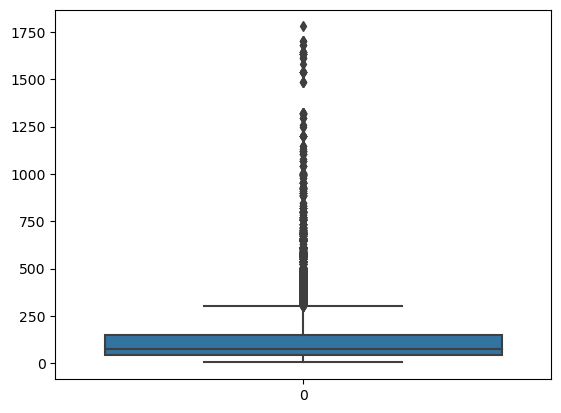

In [53]:
sns.boxplot(class1_0.Total_EMI_per_month)

In [54]:
IQR2=class1_0.Total_EMI_per_month.quantile(0.75)-class1_0.Total_EMI_per_month.quantile(0.25)
IQR2

104.365305080421

In [55]:
ub1=class1_0.Total_EMI_per_month.quantile(0.75)+1.5*IQR2
lb1=class1_0.Total_EMI_per_month.quantile(0.25)-1.5*IQR2
print(ub1,lb1)

305.1640012427123 -112.2972190789717


In [56]:
class1_0.loc[class1_0['Total_EMI_per_month']>305.5343241207638,'Total_EMI_per_month']=305.5343241207638

<Axes: >

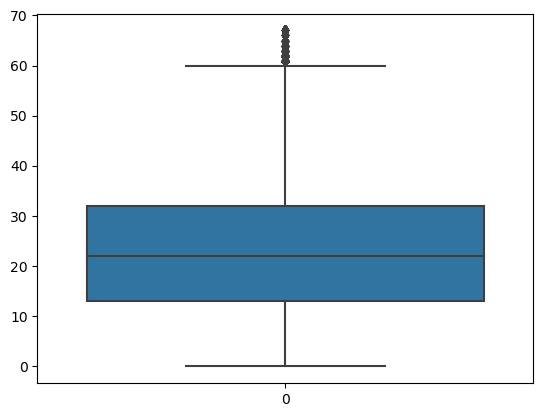

In [57]:
sns.boxplot(class1_0.Delay_from_due_date)

<Axes: xlabel='Delay_from_due_date', ylabel='Density'>

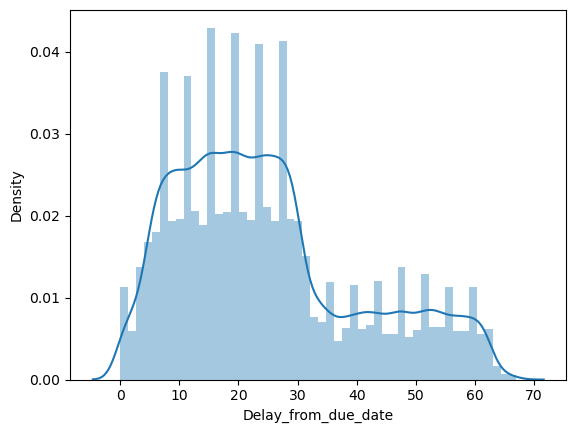

In [58]:
sns.distplot(class1_0.Delay_from_due_date)

In [59]:
ub=class1_0.Delay_from_due_date.mean()+3*class1_0.Delay_from_due_date.std()
lb=class1_0.Delay_from_due_date.mean()-3*class1_0.Delay_from_due_date.std()
print(ub,lb)

71.46680662894858 -21.9592147645673


In [60]:
class1_0.loc[class1_0['Delay_from_due_date']>71.63027178639233,'Delay_from_due_date']=71.63027178639233

<Axes: >

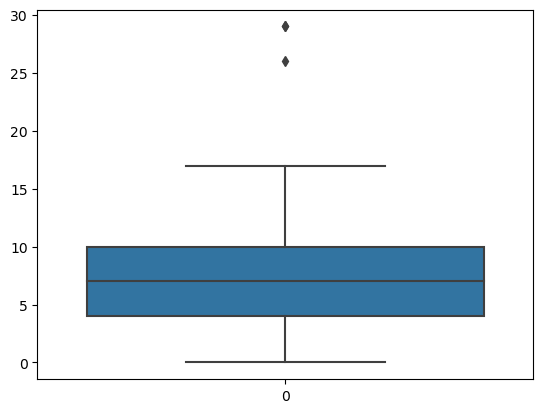

In [61]:
sns.boxplot(class1_0.Num_Credit_Inquiries)

In [62]:
class1_0.Num_Credit_Inquiries.describe()

count    106298.000000
mean          6.725348
std           3.921423
min           0.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          29.000000
Name: Num_Credit_Inquiries, dtype: float64

In [63]:
ub1=class1_0.Num_Credit_Inquiries.mean()+3*class1_0.Num_Credit_Inquiries.std()
lb1=class1_0.Num_Credit_Inquiries.mean()-3*class1_0.Num_Credit_Inquiries.std()
print(ub1,lb1)

18.48961734182317 -5.038922126485156


In [64]:
class1_0.loc[class1_0['Num_Credit_Inquiries']>18.490500253341438,'Num_Credit_Inquiries']=18.490500253341438

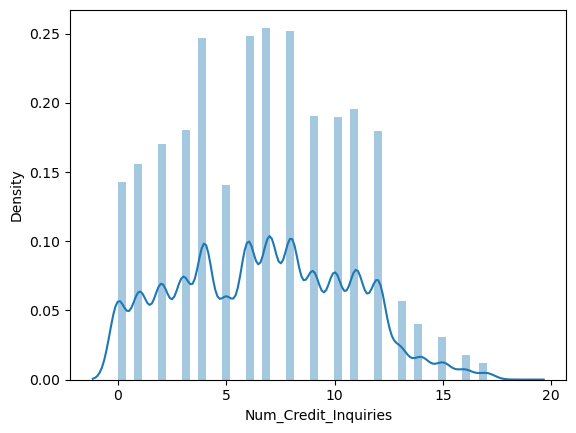

In [65]:
sns.distplot(class1_0.Num_Credit_Inquiries)
plt.show()

<Axes: >

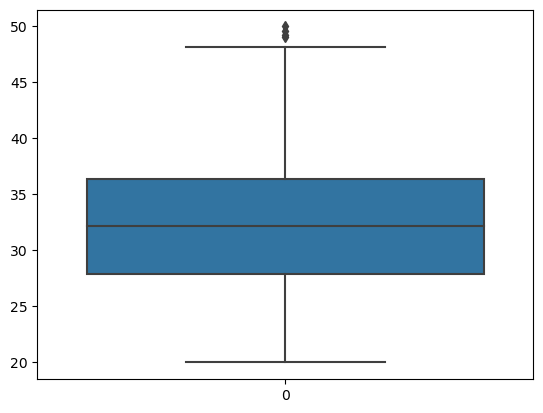

In [66]:
sns.boxplot(class1_0.Credit_Utilization_Ratio)

<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Density'>

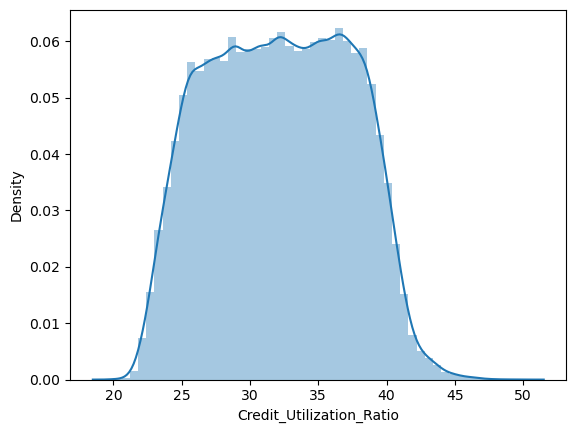

In [67]:
sns.distplot(class1_0['Credit_Utilization_Ratio'])

In [68]:
ub1=class1_0.Credit_Utilization_Ratio.mean()+3*class1_0.Credit_Utilization_Ratio.std()
lb1=class1_0.Credit_Utilization_Ratio.mean()-3*class1_0.Credit_Utilization_Ratio.std()
print(ub1,lb1)

47.39378979135199 16.917685140903885


In [69]:
class1_0.loc[class1_0['Credit_Utilization_Ratio']>47.42730611790552,'Credit_Utilization_Ratio']=47.42730611790552

<Axes: >

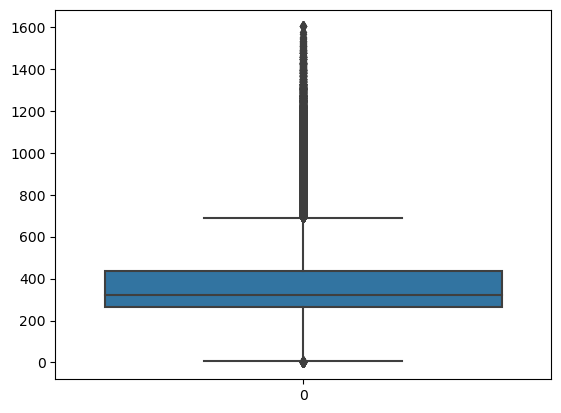

In [70]:
sns.boxplot(class1_0.Monthly_Balance)

In [71]:
IQR6=class1_0.Monthly_Balance.quantile(0.75)-class1_0.Monthly_Balance.quantile(0.25)
IQR6

171.5173640835273

In [72]:
ub1=class1_0.Monthly_Balance.quantile(0.75)+1.5*IQR6
lb1=class1_0.Monthly_Balance.quantile(0.25)-1.5*IQR6
print(ub1,lb1)

691.2289986386006 5.159542304491481


In [73]:
class1_0.loc[class1_0['Monthly_Balance']>690.7618080654652,'Monthly_Balance']=690.7618080654652
class1_0.loc[class1_0['Monthly_Balance']<5.151651507084409,'Monthly_Balance']=5.151651507084409

<Axes: >

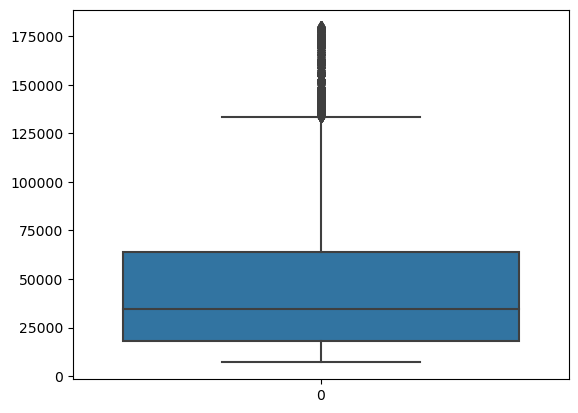

In [74]:
sns.boxplot(class1_0.Annual_Income)

In [75]:
IQR7=class1_0.Annual_Income.quantile(0.75)-class1_0.Annual_Income.quantile(0.25)
IQR7

46108.92

In [76]:
ub1=class1_0.Annual_Income.quantile(0.75)+1.5*IQR7
lb1=class1_0.Annual_Income.quantile(0.25)-1.5*IQR7
print(ub1,lb1)

133273.89 -51161.79000000001


In [77]:
class1_0.loc[class1_0['Annual_Income']>132590.535,'Annual_Income']=132590.535

<Axes: >

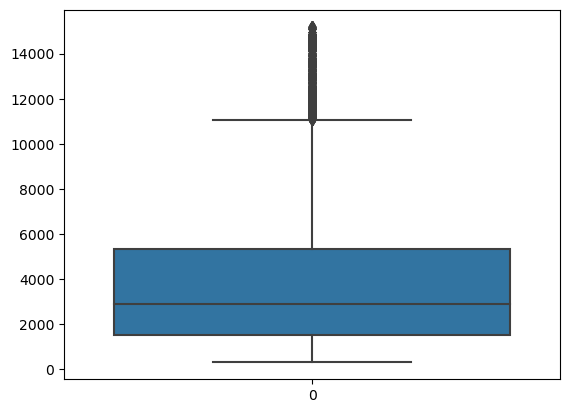

In [78]:
sns.boxplot(class1_0.Monthly_Inhand_Salary)

In [79]:
IQR8=class1_0.Monthly_Inhand_Salary.quantile(0.75)-class1_0.Monthly_Inhand_Salary.quantile(0.25)
IQR8

3823.8175

In [80]:
ub1=class1_0.Monthly_Inhand_Salary.quantile(0.75)+1.5*IQR8
lb1=class1_0.Monthly_Inhand_Salary.quantile(0.25)-1.5*IQR8
print(ub1,lb1)

11069.53125 -4225.7387499999995


In [81]:
class1_0.loc[class1_0['Monthly_Inhand_Salary']>11053.17375,'Monthly_Inhand_Salary']=11053.17375

<Axes: >

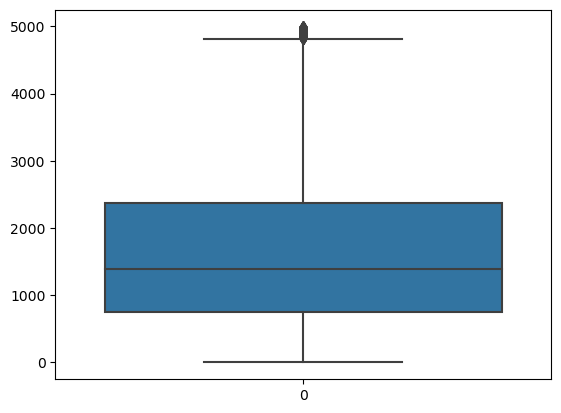

In [82]:
sns.boxplot(class1_0.Outstanding_Debt)

<Axes: xlabel='Outstanding_Debt', ylabel='Density'>

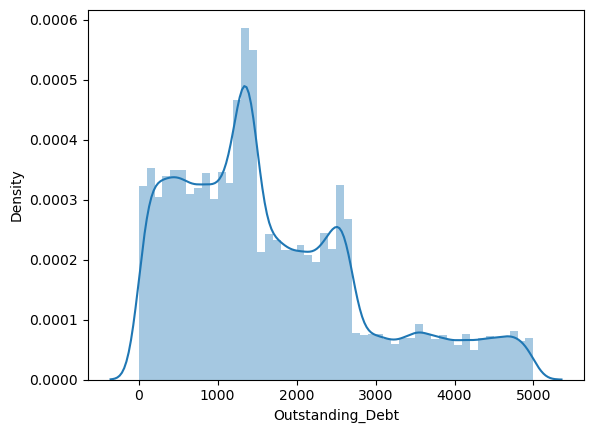

In [83]:
sns.distplot(class1_0['Outstanding_Debt'])

In [84]:
IQR9=class1_0.Outstanding_Debt.quantile(0.75)-class1_0.Outstanding_Debt.quantile(0.25)
IQR9

1624.3525

In [85]:
ub1=class1_0.Outstanding_Debt.quantile(0.75)+1.5*IQR9
lb1=class1_0.Outstanding_Debt.quantile(0.25)-1.5*IQR9
print(ub1,lb1)

4815.438749999999 -1681.97125


In [86]:
class1_0.loc[class1_0['Outstanding_Debt']>4815.092500000001,'Outstanding_Debt']=4815.092500000001

<Axes: >

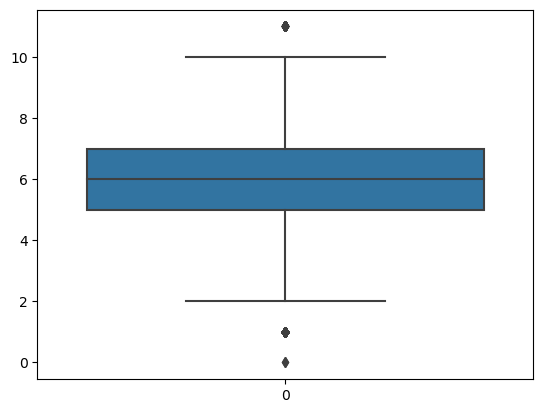

In [87]:
sns.boxplot(class1_0.Num_Credit_Card)

In [88]:
ub=class1_0.Num_Credit_Card.mean()+3*class1_0.Num_Credit_Card.std()
lb=class1_0.Num_Credit_Card.mean()-3*class1_0.Num_Credit_Card.std()
print(ub,lb)

12.073743644930962 -0.052595551834196286


In [89]:
class1_0.loc[class1_0['Num_Credit_Card']>12.078012066670158,'Num_Credit_Card']=12.078012066670158
class1_0.loc[class1_0['Num_Credit_Card']<-0.05025989823801513,'Num_Credit_Card']=-0.05025989823801513

## Skewness Treatment

In [90]:
credit.skew()

Delay_from_due_date         0.847512
Num_of_Delayed_Payment     -0.293121
Num_Credit_Inquiries        0.242254
Credit_Utilization_Ratio    0.024807
Credit_History_Age          0.120521
Payment_of_Min_Amount      -1.028921
Amount_invested_monthly     2.565720
Monthly_Balance             1.684273
Credit_Mix                 -0.485553
Payment_Behaviour          -0.058364
Age                         0.176806
Annual_Income               1.197231
Num_Bank_Accounts          -0.313777
Num_Credit_Card             0.289008
Interest_Rate               0.319114
Num_of_Loan                 0.309824
Monthly_Inhand_Salary       1.194741
Changed_Credit_Limit        0.606259
Outstanding_Debt            1.018827
Total_EMI_per_month         3.533214
Credit_Score               -0.615554
dtype: float64

In [91]:
class1_0['Monthly_Balance']=np.sqrt(class1_0['Monthly_Balance'])
class1_0['Amount_invested_monthly']=np.sqrt(class1_0['Amount_invested_monthly'])
class1_0['Total_EMI_per_month']=np.sqrt(class1_0['Total_EMI_per_month'])
class1_0['Monthly_Inhand_Salary']=np.sqrt(class1_0['Monthly_Inhand_Salary'])
class1_0['Annual_Income']=np.sqrt(class1_0['Annual_Income'])

class1_0.skew()

Delay_from_due_date         0.730306
Num_of_Delayed_Payment     -0.325234
Num_Credit_Inquiries        0.120892
Credit_Utilization_Ratio    0.021226
Credit_History_Age          0.222987
Payment_of_Min_Amount      -1.100248
Amount_invested_monthly     0.486132
Monthly_Balance             0.116849
Credit_Mix                 -0.299190
Payment_Behaviour          -0.097783
Age                         0.180767
Annual_Income               0.507297
Num_Bank_Accounts          -0.379758
Num_Credit_Card             0.237358
Interest_Rate               0.167711
Num_of_Loan                 0.222039
Monthly_Inhand_Salary       0.488405
Changed_Credit_Limit        0.614932
Outstanding_Debt            0.866124
Total_EMI_per_month         0.529839
Credit_Score                0.000000
dtype: float64

## Visualization

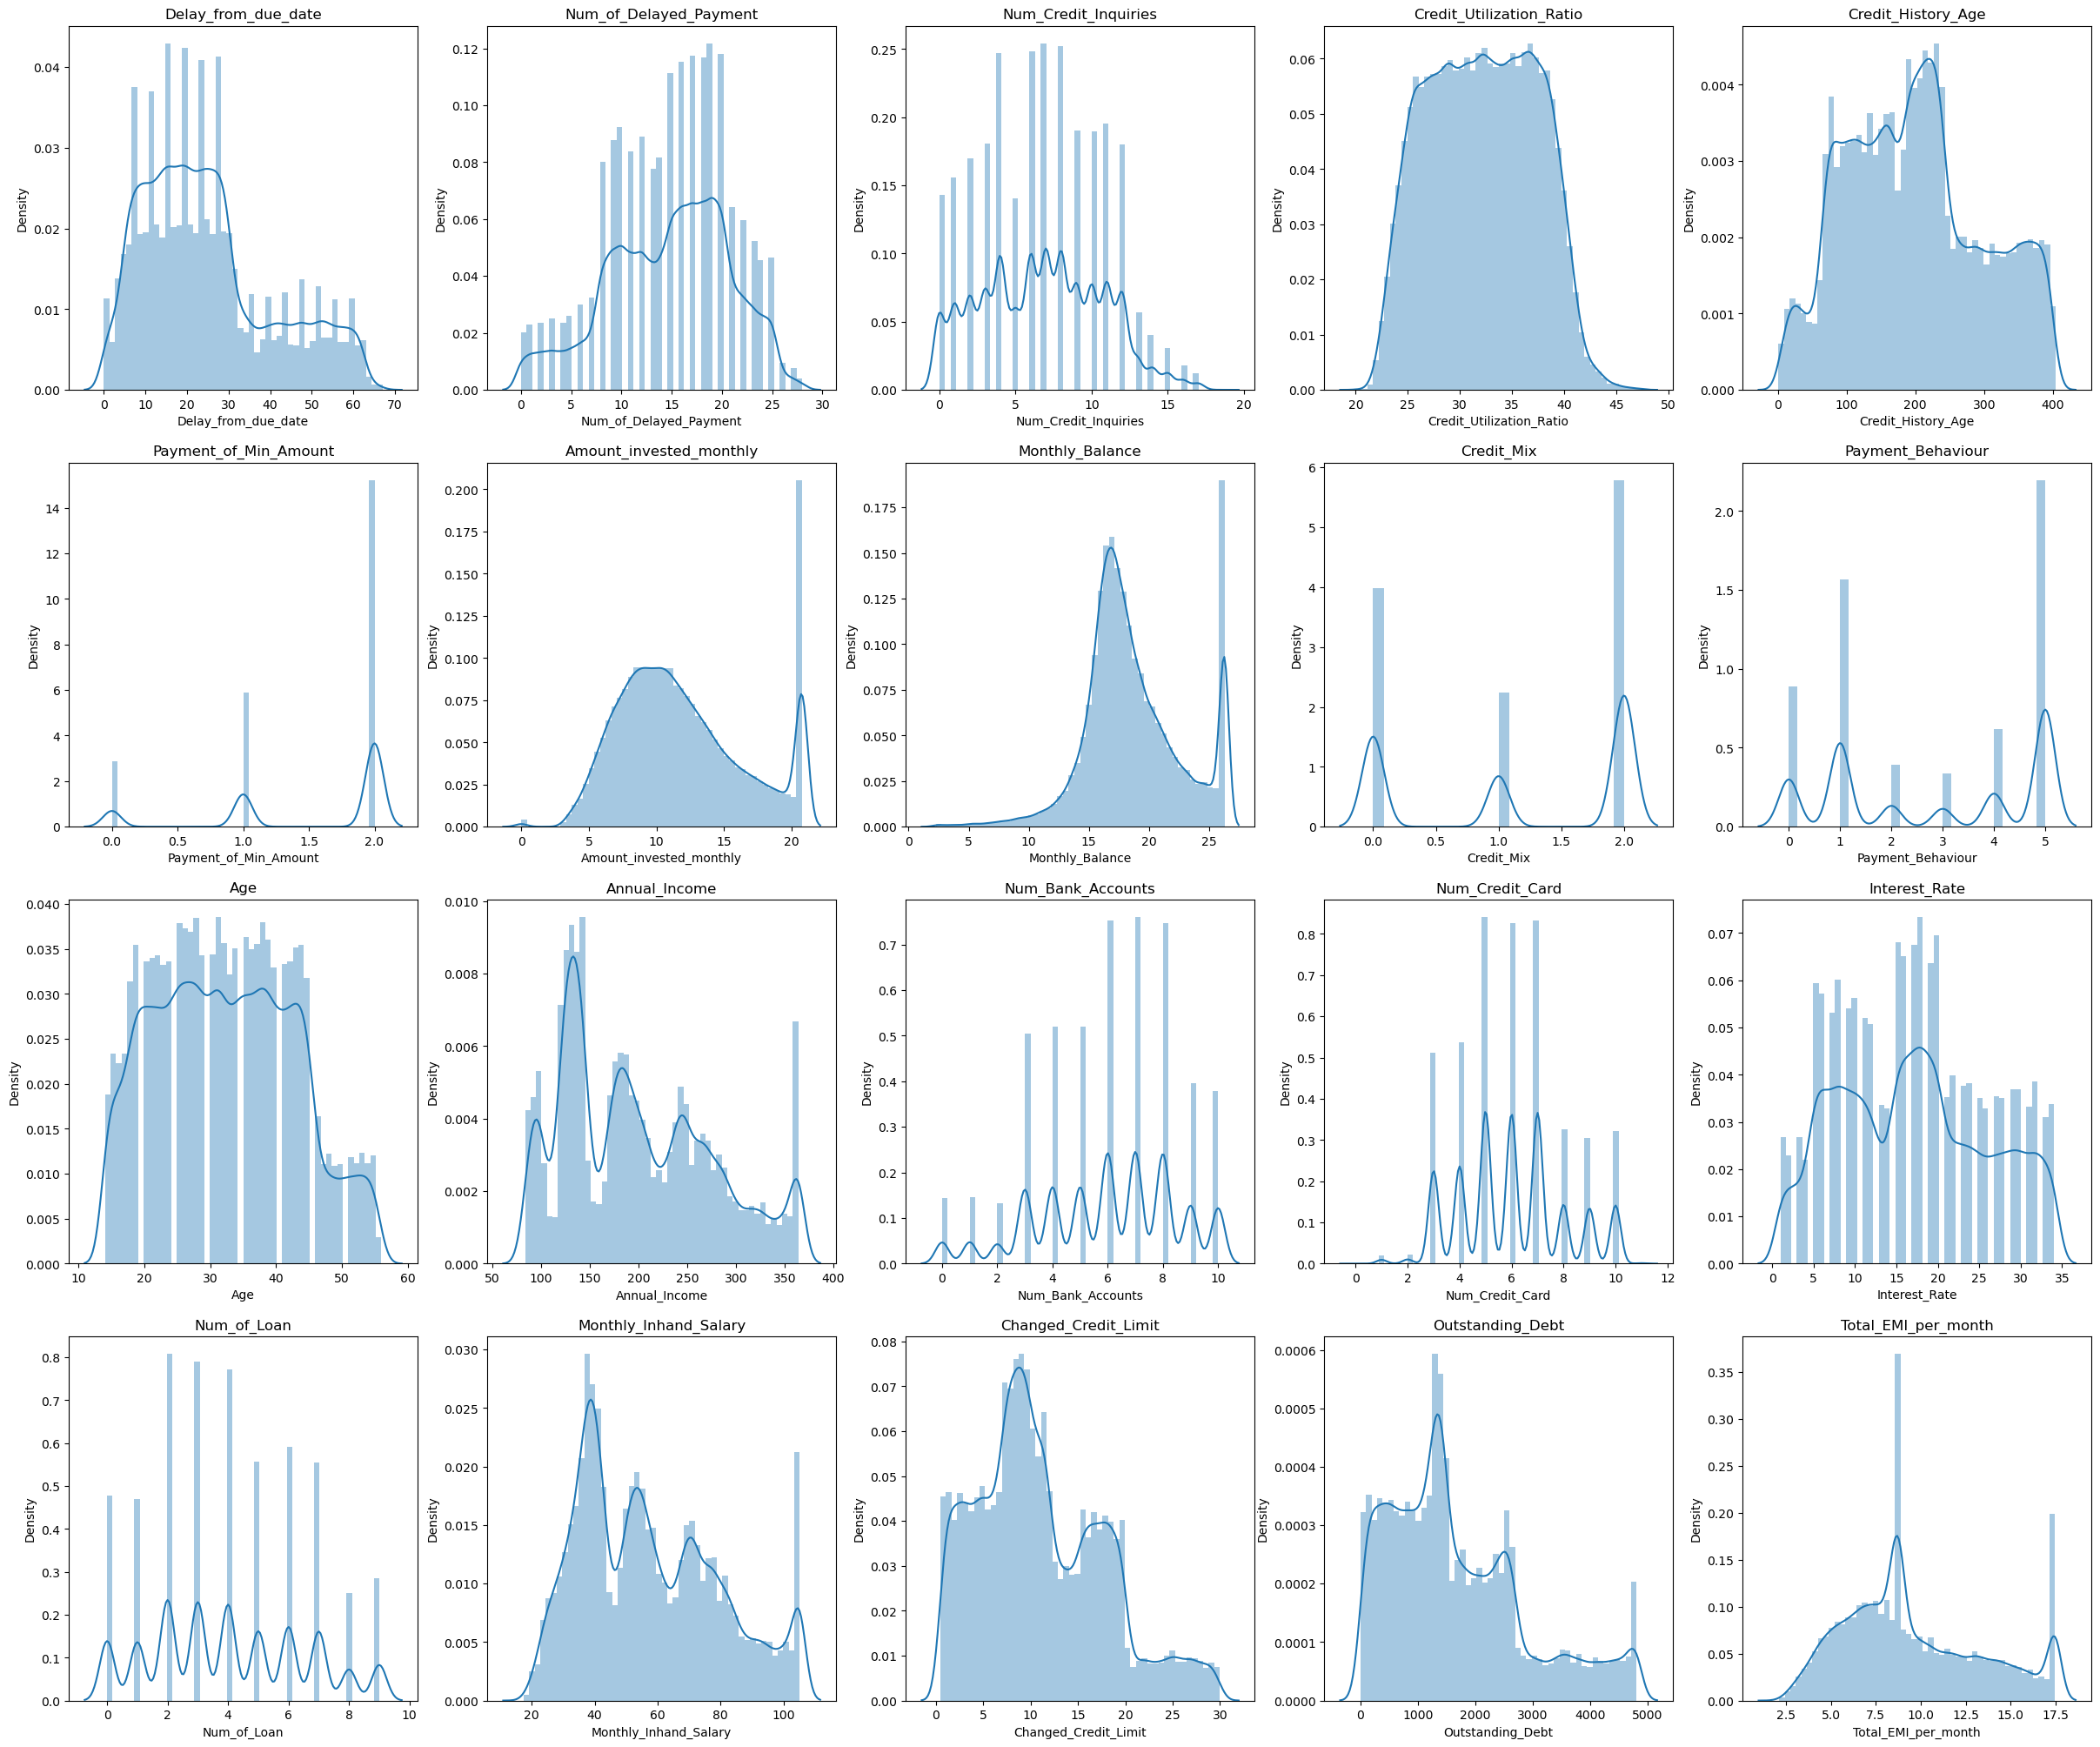

In [92]:
import seaborn as sns
num_cols=['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance',
        'Credit_Mix', 'Payment_Behaviour', 'Age',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,5,figsize=(30,25))
index=0
ax=ax.flatten()
for i in class1_0:
    if i in num_cols:
        sns.distplot(class1_0[i],ax=ax[index])
        ax[index].set_title(i)
        index+=1              
plt.show()

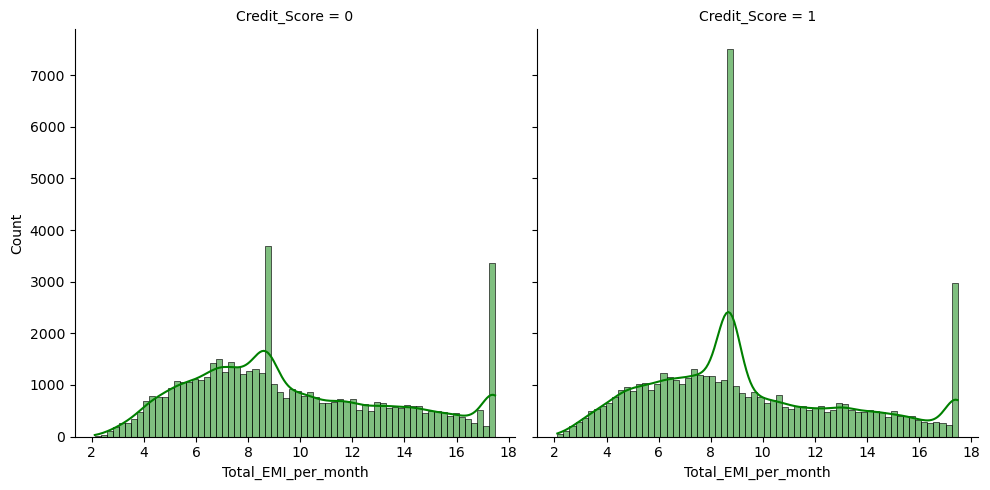

In [93]:
sns.displot(data=class1_0,x='Total_EMI_per_month',col='Credit_Score',kde=True,color='g')
plt.show()

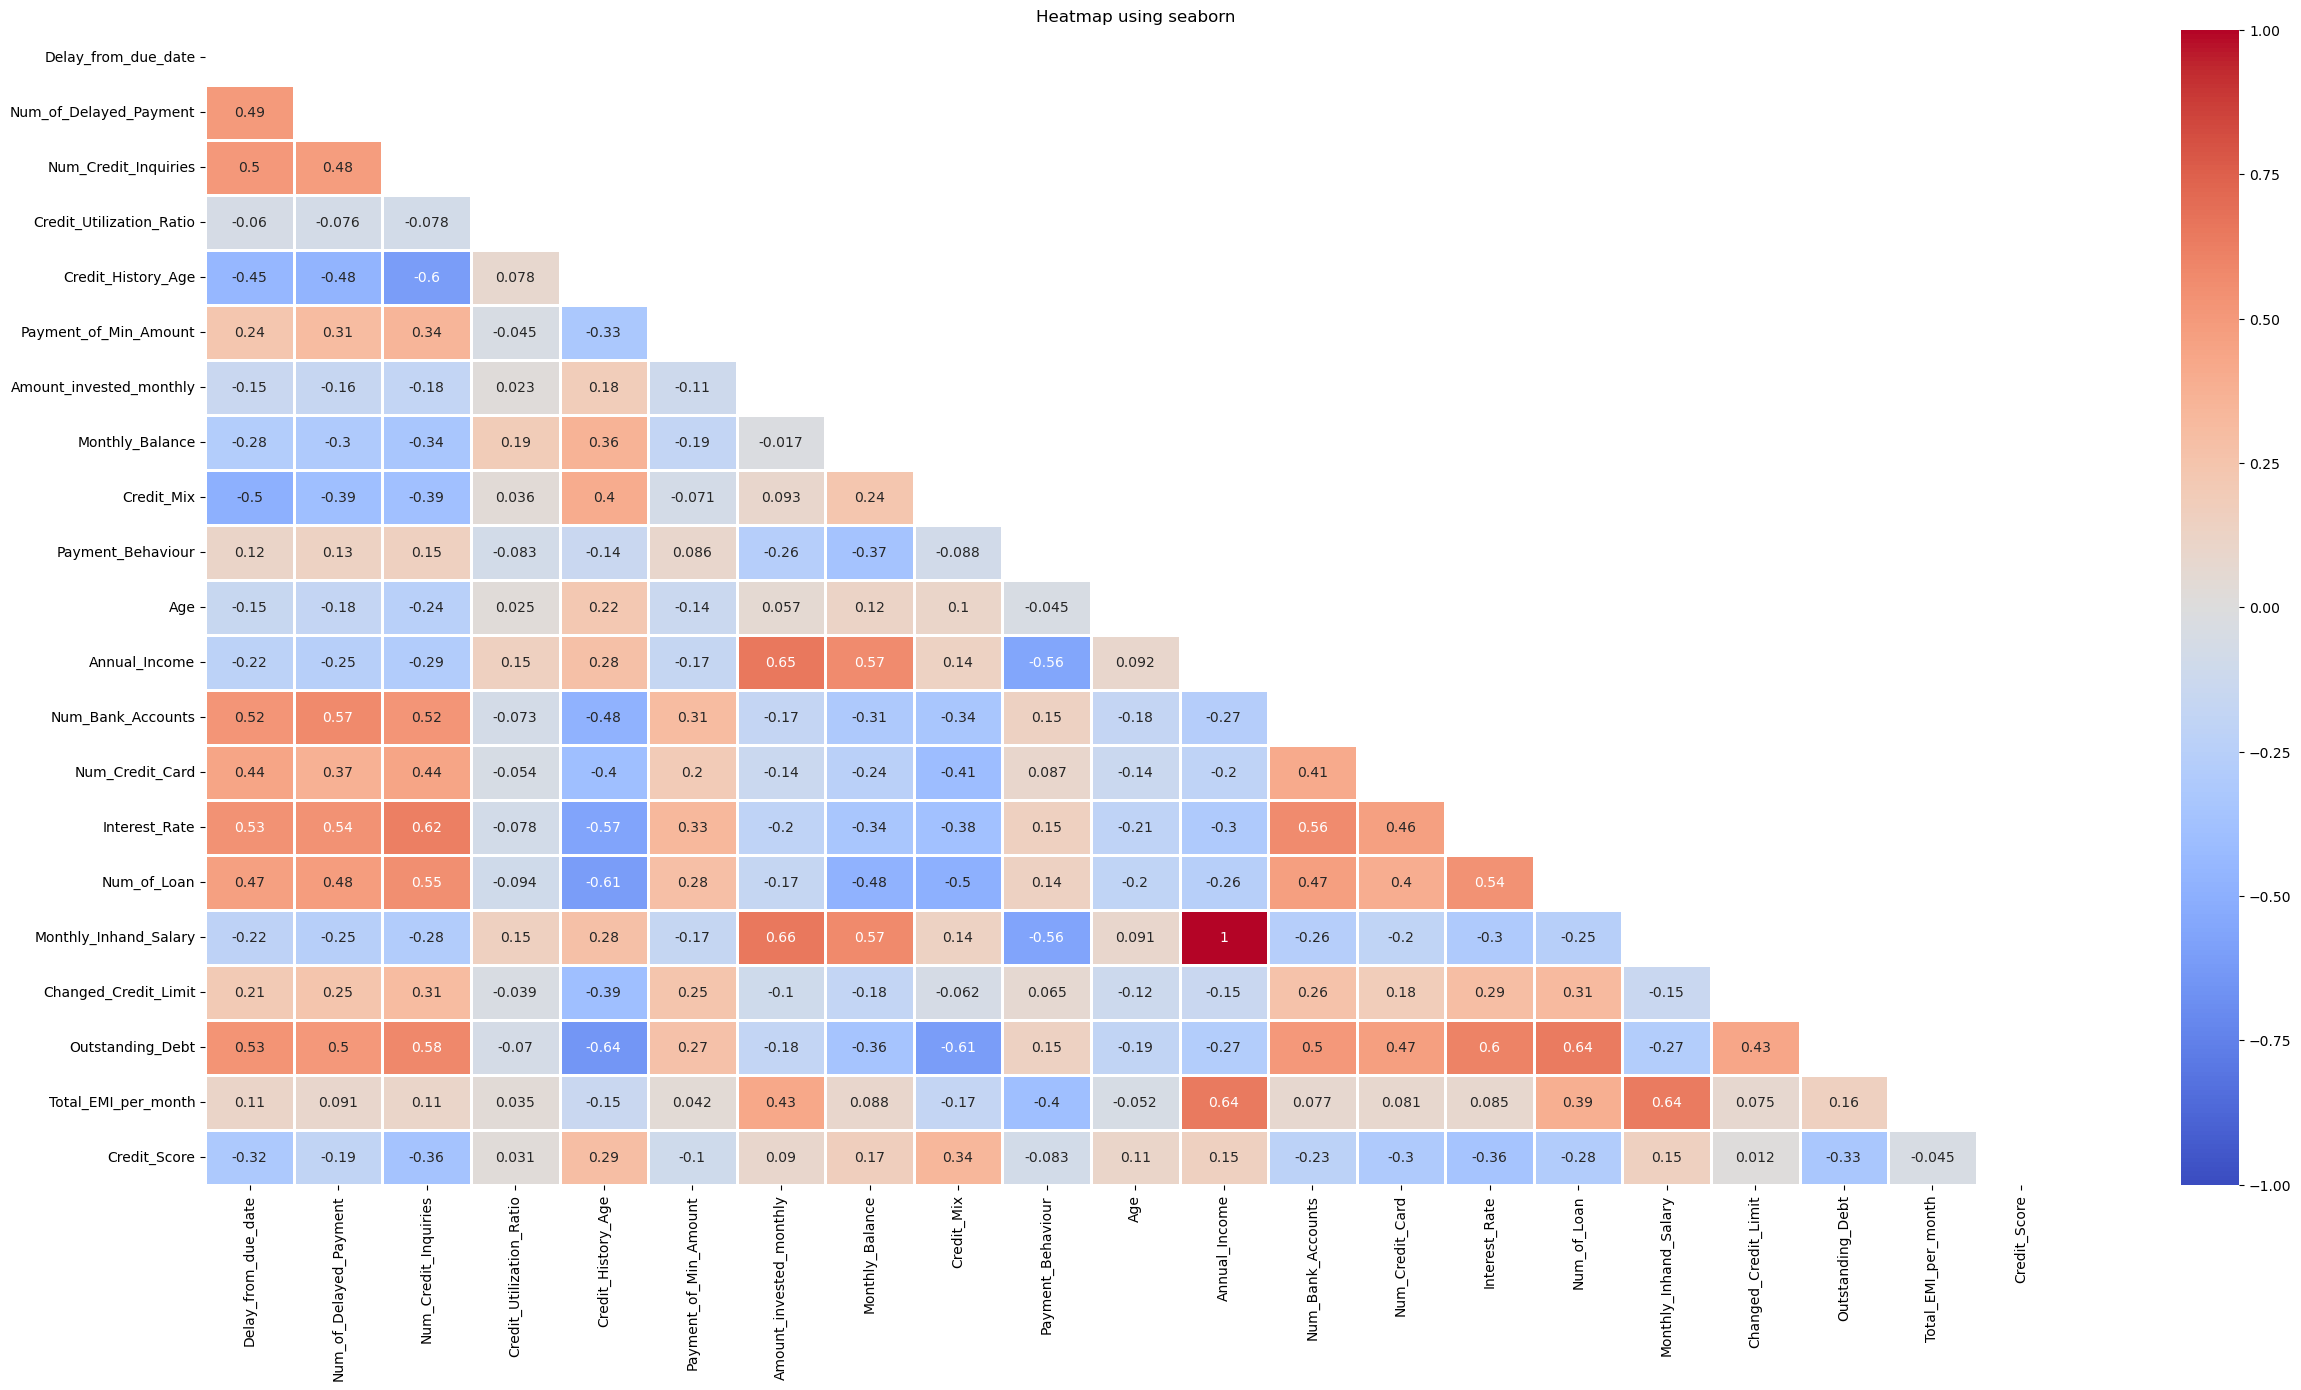

In [94]:
plt.figure(figsize=(30,15))
mask=np.triu(np.ones_like(class1_0.corr(),dtype=bool))
heatmap=sns.heatmap(class1_0.corr(),linewidth=2,annot=True,cmap='coolwarm',vmin=-1,vmax=1,mask=mask)   #cm.Blues_.
plt.title('Heatmap using seaborn')
plt.show()

<Axes: xlabel='Credit_Mix', ylabel='count'>

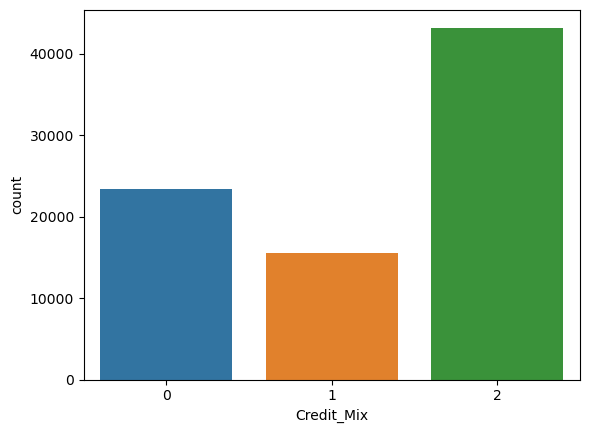

In [95]:
sns.countplot(x=credit.Credit_Mix)

In [96]:
#from this countplot we can conclude more number of people having standard credit_mix in our data

In [97]:
x1=class1_0.iloc[:,:-1]
y1=class1_0.iloc[:,-1]
x_tr,x_te,y_tr,y_te=train_test_split(x1,y1,test_size=0.2,random_state=100)
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((85038, 20), (21260, 20), (85038,), (21260,))

# Logistic-Random Oversampling

In [98]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,classification_report
print(lg)
lg.fit(x_tr,y_tr)
lg_op=lg.predict(x_te)
ocf1=confusion_matrix(y_te,lg_op)
oac1=ocf1.diagonal().sum()/ocf1.sum()*100
ore1=recall_score(y_te,lg_op)
opr1=precision_score(y_te,lg_op)
of1=f1_score(y_te,lg_op,average='weighted')
print("\n",classification_report(y_te,lg_op)) 
print("\nConfusion Matrix")
print(ocf1)

LogisticRegression()

               precision    recall  f1-score   support

           0       0.75      0.69      0.72     10685
           1       0.71      0.76      0.74     10575

    accuracy                           0.73     21260
   macro avg       0.73      0.73      0.73     21260
weighted avg       0.73      0.73      0.73     21260


Confusion Matrix
[[7424 3261]
 [2490 8085]]


# DT-Random oversampling

In [99]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,classification_report
print(dt)
dt.fit(x_tr,y_tr)
dt_op=dt.predict(x_te)
ocf2=confusion_matrix(y_te,dt_op)
oac2=ocf2.diagonal().sum()/ocf2.sum()*100
ore2=recall_score(y_te,dt_op)
opr2=precision_score(y_te,dt_op)
of2=f1_score(y_te,dt_op,average="weighted")
print("\n",classification_report(y_te,dt_op))
print("\nConfusion Matrix")
print(ocf2)

DecisionTreeClassifier()

               precision    recall  f1-score   support

           0       0.87      0.94      0.90     10685
           1       0.93      0.86      0.89     10575

    accuracy                           0.90     21260
   macro avg       0.90      0.90      0.90     21260
weighted avg       0.90      0.90      0.90     21260


Confusion Matrix
[[10006   679]
 [ 1461  9114]]


# RF-Random oversampling

In [100]:
print(rf)
rf.fit(x_tr,y_tr)
rf_op=rf.predict(x_te)
ocf3=confusion_matrix(y_te,rf_op)
oac3=ocf3.diagonal().sum()/ocf3.sum()*100
ore3=recall_score(y_te,rf_op)
opr3=precision_score(y_te,rf_op)
of3=f1_score(y_te,rf_op,average="weighted")
print("\n",classification_report(y_te,rf_op))
print("\nConfusion Matrix")
print(ocf3)

RandomForestClassifier()

               precision    recall  f1-score   support

           0       0.89      0.97      0.93     10685
           1       0.97      0.88      0.92     10575

    accuracy                           0.92     21260
   macro avg       0.93      0.92      0.92     21260
weighted avg       0.93      0.92      0.92     21260


Confusion Matrix
[[10363   322]
 [ 1320  9255]]


# KNN-Random oversampling

In [101]:
print(knn)
knn.fit(x_tr,y_tr)
knn_op=knn.predict(x_te)
ocf4=confusion_matrix(y_te,knn_op)
oac4=ocf4.diagonal().sum()/ocf4.sum()*100
ore4=recall_score(y_te,knn_op)
opr4=precision_score(y_te,knn_op)
of4=f1_score(y_te,knn_op,average="weighted")
print("\n",classification_report(y_te,knn_op)) 
print("\nConfusion Matrix")
print(ocf4)

KNeighborsClassifier()

               precision    recall  f1-score   support

           0       0.84      0.94      0.89     10685
           1       0.93      0.82      0.88     10575

    accuracy                           0.88     21260
   macro avg       0.89      0.88      0.88     21260
weighted avg       0.89      0.88      0.88     21260


Confusion Matrix
[[10068   617]
 [ 1860  8715]]


# NB-Random oversampling

In [102]:
print(nb)
nb.fit(x_tr,y_tr)
nb_op=nb.predict(x_te)
ocf5=confusion_matrix(y_te,nb_op)
oac5=ocf5.diagonal().sum()/ocf5.sum()*100
ore5=recall_score(y_te,nb_op)
opr5=precision_score(y_te,nb_op)
of5=f1_score(y_te,nb_op,average="weighted")
print("\n",classification_report(y_te,nb_op)) 
print("\nConfusion Matrix")
print(ocf5)

MultinomialNB()

               precision    recall  f1-score   support

           0       0.74      0.69      0.72     10685
           1       0.71      0.76      0.73     10575

    accuracy                           0.73     21260
   macro avg       0.73      0.73      0.73     21260
weighted avg       0.73      0.73      0.73     21260


Confusion Matrix
[[7422 3263]
 [2561 8014]]


# XGB-Random oversampling

In [103]:
print(xgb)
xgb.fit(x_tr,y_tr)
xgb_op=xgb.predict(x_te)
ocf6=confusion_matrix(y_te,xgb_op)
oac6=ocf6.diagonal().sum()/ocf6.sum()*100
ore6=recall_score(y_te,xgb_op)
opr6=precision_score(y_te,xgb_op)
of6=f1_score(y_te,xgb_op,average="weighted")
print("\n",classification_report(y_te,xgb_op)) 
print("\nConfusion Matrix")
print(ocf6)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

               precision    recall  f1-score   support

           0       0.84      0.89      0.87     10685
           1       0.88      0.83      0.86     10575

    accuracy                           0.86     21260
   macro avg       0.86     

# SVM-Random oversampling

In [104]:
print(svm)
svm.fit(x_tr,y_tr)
svm_op=svm.predict(x_te)
ocf7=confusion_matrix(y_te,svm_op)
oac7=ocf7.diagonal().sum()/ocf7.sum()*100
ore7=recall_score(y_te,svm_op)
opr7=precision_score(y_te,svm_op)
of7=f1_score(y_te,svm_op,average="weighted")
print("\n",classification_report(y_te,svm_op)) 
print("\nConfusion Matrix")
print(ocf7)

SVC()

               precision    recall  f1-score   support

           0       0.75      0.75      0.75     10685
           1       0.75      0.75      0.75     10575

    accuracy                           0.75     21260
   macro avg       0.75      0.75      0.75     21260
weighted avg       0.75      0.75      0.75     21260


Confusion Matrix
[[8002 2683]
 [2647 7928]]


#### Model2 After CI and EDA

In [105]:
l2=['Logistic','Decision Tree','Random Forest','KNN','xgb','NB','SVM']
accuracy1=[oac1,oac2,oac3,oac4,oac5,oac6,oac7]
precision1=[opr1,opr2,opr3,opr4,opr5,opr6,opr7]
recall1=[ore1,ore2,ore3,ore4,ore5,ore6,ore7]
f1_score1=[of1,of2,of3,of4,of5,of6,of7]
t2=pd.DataFrame({"Model":l2,"Accuracy":accuracy1,"Precision":precision1,"Recall":recall1,"f1-score":f1_score1})
print("\nMODEL 2(RANDOM OVERSAMPLING) RESULTS :")
print(tabulate(t2,headers="keys",tablefmt="psql"))


MODEL 2(RANDOM OVERSAMPLING) RESULTS :
+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision |   Recall |   f1-score |
|----+---------------+------------+-------------+----------+------------|
|  0 | Logistic      |    72.9492 |    0.712586 | 0.764539 |   0.729187 |
|  1 | Decision Tree |    89.9341 |    0.930665 | 0.861844 |   0.899186 |
|  2 | Random Forest |    92.2766 |    0.966378 | 0.875177 |   0.922576 |
|  3 | KNN           |    88.349  |    0.933883 | 0.824113 |   0.883055 |
|  4 | xgb           |    72.6058 |    0.71065  | 0.757825 |   0.725806 |
|  5 | NB            |    86.1007 |    0.882684 | 0.831017 |   0.860868 |
|  6 | SVM           |    74.9294 |    0.747149 | 0.749693 |   0.749296 |
+----+---------------+------------+-------------+----------+------------+


In [107]:
prob=rf.predict_proba(x_te)
df=pd.DataFrame(prob)

In [108]:
#AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_te,df.iloc[:,1])

Text(0.5, 1.0, 'AUC-Curve')

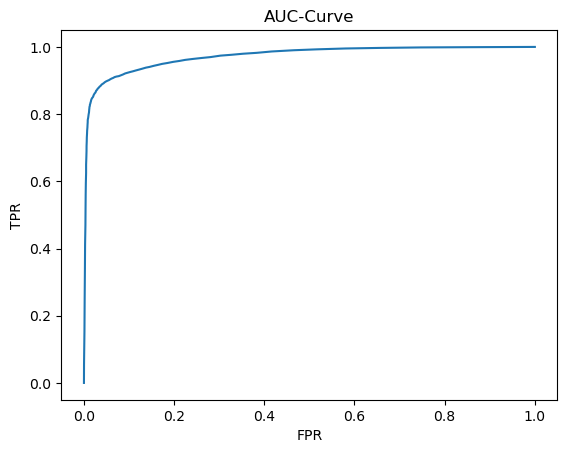

In [109]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-Curve')

# SMOTE

# Model Results

In [110]:
from tabulate import tabulate
print("BASIC MODEL RESULTS :")
print(tabulate(t1,headers="keys",tablefmt="psql"))
print("\nMODEL 2(RANDOM OVERSAMPLING) RESULTS :")
print(tabulate(t2,headers="keys",tablefmt="psql"))
#print("\nMODEL 3(SMOTE) RESULTS :")
#print(tabulate(t3,headers="keys",tablefmt="psql"))

BASIC MODEL RESULTS :
+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision |   Recall |   f1-score |
|----+---------------+------------+-------------+----------+------------|
|  0 | Logistic      |    68.1702 |    0.713134 | 0.853489 |   0.777024 |
|  1 | Decision Tree |    81.3976 |    0.858137 | 0.855082 |   0.856607 |
|  2 | Random Forest |    87.4726 |    0.91616  | 0.888525 |   0.90213  |
|  3 | KNN           |    83.9299 |    0.885076 | 0.865012 |   0.874929 |
|  4 | xgb           |    83.9421 |    0.872532 | 0.881686 |   0.877085 |
|  5 | NB            |    65.1144 |    0.792822 | 0.626979 |   0.700214 |
|  6 | SVM           |    65.3884 |    0.682173 | 0.875035 |   0.766661 |
+----+---------------+------------+-------------+----------+------------+

MODEL 2(RANDOM OVERSAMPLING) RESULTS :
+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision | 

Out of all the 3 models(Base model, SMOTE, Random Oversampling) Random Oversampling model is good and in that Random Forest Model is well fitted to the data as the Accuracy is high and also the count of TN is low in this model as compared to all the other models and also from the classification_report we can observe that the model classify the credit score in both the classes(Standard-->0, Poor-->1) equally. So, our model is giving us an unbiased results.

## Feature Selection
##### Recursive Feature Elimination

In [111]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
rfe=RFE(dtree,n_features_to_select=5)

In [112]:
rfe.fit(class1_0.iloc[:,:-1],class1_0.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [113]:
rfe.support_

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False])

In [114]:
f1=pd.DataFrame({'feature':list(rfe.support_),'col':list(class1_0.iloc[:,:-1].columns)})
f1

,feature,col
0,False,Delay_from_due_date
1,False,Num_of_Delayed_Payment
2,False,Num_Credit_Inquiries
3,True,Credit_Utilization_Ratio
4,True,Credit_History_Age
5,False,Payment_of_Min_Amount
6,False,Amount_invested_monthly
7,False,Monthly_Balance
8,False,Credit_Mix
9,False,Payment_Behaviour


In [115]:
class1_0.columns

Index(['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Mix', 'Payment_Behaviour', 'Age', 'Annual_Income',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Total_EMI_per_month', 'Credit_Score'],
      dtype='object')

In [116]:
df=class1_0.drop(['Delay_from_due_date','Num_of_Delayed_Payment','Payment_of_Min_Amount','Num_Credit_Inquiries','Credit_Mix','Age','Annual_Income','Num_Bank_Accounts',
             'Num_Credit_Card','Num_of_Loan','Monthly_Inhand_Salary','Total_EMI_per_month','Payment_Behaviour','Monthly_Balance','Amount_invested_monthly'],axis=1)

In [117]:
df.isnull().sum()

Credit_Utilization_Ratio    0
Credit_History_Age          0
Interest_Rate               0
Changed_Credit_Limit        0
Outstanding_Debt            0
Credit_Score                0
dtype: int64

In [118]:
n_x=df.iloc[:,:-1]
n_y=df.iloc[:,-1]

In [119]:
xtr,xte,ytr,yte=train_test_split(n_x,n_y,test_size=0.2,random_state=101)
xtr.shape,xte.shape,ytr.shape,yte.shape

((85038, 5), (21260, 5), (85038,), (21260,))

In [120]:
# Logistic-FS
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score,classification_report
print(lg)
lg.fit(xtr,ytr)
lg_f=lg.predict(xte)
fcf1=confusion_matrix(yte,lg_f)
fac1=fcf1.diagonal().sum()/fcf1.sum()*100
fre1=recall_score(yte,lg_f)
fpr1=precision_score(yte,lg_f)
ff1=f1_score(yte,lg_f,average='weighted')
print("\n",classification_report(yte,lg_f)) 
print("\nConfusion Matrix")
print(fcf1)

LogisticRegression()

               precision    recall  f1-score   support

           0       0.72      0.69      0.71     10584
           1       0.70      0.74      0.72     10676

    accuracy                           0.71     21260
   macro avg       0.71      0.71      0.71     21260
weighted avg       0.71      0.71      0.71     21260


Confusion Matrix
[[7270 3314]
 [2758 7918]]


In [121]:
print(dt)
dt.fit(xtr,ytr)
dt_f=dt.predict(xte)
fcf2=confusion_matrix(yte,dt_f)
fac2=fcf2.diagonal().sum()/fcf2.sum()*100
fre2=recall_score(yte,dt_f)
fpr2=precision_score(yte,dt_f)
ff2=f1_score(yte,dt_f,average='weighted')
print("\n",classification_report(yte,dt_f)) 
print("\nConfusion Matrix")
print(fcf2)

DecisionTreeClassifier()

               precision    recall  f1-score   support

           0       0.87      0.94      0.90     10584
           1       0.94      0.86      0.90     10676

    accuracy                           0.90     21260
   macro avg       0.90      0.90      0.90     21260
weighted avg       0.90      0.90      0.90     21260


Confusion Matrix
[[9983  601]
 [1496 9180]]


In [122]:
print(rf)
rf.fit(xtr,ytr)
rf_f=rf.predict(xte)
fcf3=confusion_matrix(yte,rf_f)
fac3=fcf3.diagonal().sum()/fcf3.sum()*100
fre3=recall_score(yte,rf_f)
fpr3=precision_score(yte,rf_f)
ff3=f1_score(yte,rf_f,average='weighted')
print("\n",classification_report(yte,rf_f)) 
print("\nConfusion Matrix")
print(fcf3)

RandomForestClassifier()

               precision    recall  f1-score   support

           0       0.88      0.97      0.92     10584
           1       0.97      0.87      0.92     10676

    accuracy                           0.92     21260
   macro avg       0.92      0.92      0.92     21260
weighted avg       0.93      0.92      0.92     21260


Confusion Matrix
[[10259   325]
 [ 1353  9323]]


In [123]:
print(knn)
knn.fit(xtr,ytr)
knn_f=knn.predict(xte)
fcf4=confusion_matrix(yte,knn_f)
fac4=fcf4.diagonal().sum()/fcf4.sum()*100
fre4=recall_score(yte,knn_f)
fpr4=precision_score(yte,knn_f)
ff4=f1_score(yte,knn_f,average='weighted')
print("\n",classification_report(yte,knn_f)) 
print("\nConfusion Matrix")
print(fcf4)

KNeighborsClassifier()

               precision    recall  f1-score   support

           0       0.82      0.94      0.88     10584
           1       0.93      0.80      0.86     10676

    accuracy                           0.87     21260
   macro avg       0.87      0.87      0.87     21260
weighted avg       0.87      0.87      0.87     21260


Confusion Matrix
[[9918  666]
 [2153 8523]]


In [124]:
print(xgb)
xgb.fit(xtr,ytr)
xgb_f=xgb.predict(xte)
fcf5=confusion_matrix(yte,knn_f)
fac5=fcf5.diagonal().sum()/fcf5.sum()*100
fre5=recall_score(yte,xgb_f)
fpr5=precision_score(yte,xgb_f)
ff5=f1_score(yte,xgb_f,average='weighted')
print("\n",classification_report(yte,xgb_f)) 
print("\nConfusion Matrix")
print(fcf5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

               precision    recall  f1-score   support

           0       0.81      0.83      0.82     10584
           1       0.83      0.81      0.82     10676

    accuracy                           0.82     21260
   macro avg       0.82     

In [125]:
print(nb)
nb.fit(xtr,ytr)
nb_f=nb.predict(xte)
fcf6=confusion_matrix(yte,nb_f)
fac6=fcf6.diagonal().sum()/fcf6.sum()*100
fre6=recall_score(yte,nb_f)
fpr6=precision_score(yte,nb_f)
ff6=f1_score(yte,nb_f,average='weighted')
print("\n",classification_report(yte,nb_f)) 
print("\nConfusion Matrix")
print(fcf6)

MultinomialNB()

               precision    recall  f1-score   support

           0       0.72      0.69      0.71     10584
           1       0.71      0.74      0.72     10676

    accuracy                           0.71     21260
   macro avg       0.72      0.71      0.71     21260
weighted avg       0.72      0.71      0.71     21260


Confusion Matrix
[[7338 3246]
 [2819 7857]]


In [126]:
from sklearn.svm import SVC
svm=SVC()
print(svm)
svm.fit(xtr,ytr)
svm_f=svm.predict(xte)
fcf7=confusion_matrix(yte,svm_f)
fac7=fcf7.diagonal().sum()/fcf7.sum()*100
fre7=recall_score(yte,svm_f)
fpr7=precision_score(yte,svm_f)
ff7=f1_score(yte,svm_f,average='weighted')
print("\n",classification_report(yte,svm_f)) 
print("\nConfusion Matrix")
print(fcf7)

SVC()

               precision    recall  f1-score   support

           0       0.73      0.75      0.74     10584
           1       0.75      0.73      0.74     10676

    accuracy                           0.74     21260
   macro avg       0.74      0.74      0.74     21260
weighted avg       0.74      0.74      0.74     21260


Confusion Matrix
[[7911 2673]
 [2854 7822]]


In [127]:
l4=['Logistic','Decision Tree','Random Forest','KNN','xgb','NB','SVM']
accuracy3=[fac1,fac2,fac3,fac4,fac5,fac6,fac7]
precision3=[fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7]
recall3=[fre1,fre2,fre3,fre4,fre5,fre6,fre7]
f1_score3=[ff1,ff2,ff3,ff4,ff5,ff6,ff7]
t4=pd.DataFrame({"Model":l4,"Accuracy":accuracy3,"Precision":precision3,"Recall":recall3,"f1-score":f1_score3})
print("\nMODEL 3(Feature Selection) RESULTS :")
print(tabulate(t4,headers="keys",tablefmt="psql"))


MODEL 3(Feature Selection) RESULTS :
+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision |   Recall |   f1-score |
|----+---------------+------------+-------------+----------+------------|
|  0 | Logistic      |    71.4393 |    0.70495  | 0.741664 |   0.714165 |
|  1 | Decision Tree |    90.1364 |    0.938554 | 0.859873 |   0.901207 |
|  2 | Random Forest |    92.1072 |    0.966314 | 0.873267 |   0.920904 |
|  3 | KNN           |    86.7404 |    0.927522 | 0.798333 |   0.866792 |
|  4 | xgb           |    86.7404 |    0.830167 | 0.810416 |   0.821527 |
|  5 | NB            |    71.4722 |    0.707647 | 0.73595  |   0.714583 |
|  6 | SVM           |    74.0028 |    0.745307 | 0.732671 |   0.740019 |
+----+---------------+------------+-------------+----------+------------+


In [129]:
prob1=rf.predict_proba(xte)
df1=pd.DataFrame(prob1)

In [130]:
#AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(yte,df1.iloc[:,1])

Text(0.5, 1.0, 'AUC-Curve')

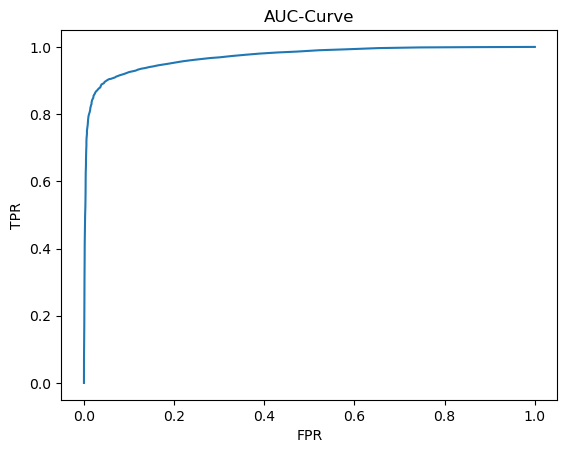

In [131]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-Curve')